In [1]:
import pandas as pd
df = pd.read_csv("athlete_events.csv")

df.head(10)
df["Sport"].unique()


array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Speed Skating',
       'Cross Country Skiing', 'Athletics', 'Ice Hockey', 'Swimming',
       'Badminton', 'Sailing', 'Biathlon', 'Gymnastics',
       'Art Competitions', 'Alpine Skiing', 'Handball', 'Weightlifting',
       'Wrestling', 'Luge', 'Water Polo', 'Hockey', 'Rowing', 'Bobsleigh',
       'Fencing', 'Equestrianism', 'Shooting', 'Boxing', 'Taekwondo',
       'Cycling', 'Diving', 'Canoeing', 'Tennis', 'Modern Pentathlon',
       'Figure Skating', 'Golf', 'Softball', 'Archery', 'Volleyball',
       'Synchronized Swimming', 'Table Tennis', 'Nordic Combined',
       'Baseball', 'Rhythmic Gymnastics', 'Freestyle Skiing',
       'Rugby Sevens', 'Trampolining', 'Beach Volleyball', 'Triathlon',
       'Ski Jumping', 'Curling', 'Snowboarding', 'Rugby',
       'Short Track Speed Skating', 'Skeleton', 'Lacrosse', 'Polo',
       'Cricket', 'Racquets', 'Motorboating', 'Military Ski Patrol',
       'Croquet', 'Jeu De Paume', 'Roque', 'Al

veri temizleme burada gereken önce eksik veri olan sütunları bulduk ardından işimize yaraycak sütunları belirledik
eksik verisi olanları dropna ile sildik
madalya kolonundaki eksik değerler madalya kazanmadı demek. none yazıyoruz.
altın madalya kazanıp kazanmadığına göre hedef değişken belirliyoruz. lamda kullandık.
medal sütununu siliyoruz


In [2]:

df.isnull().sum()

df = df[['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games', 
         'Year', 'Season', 'City', 'Sport', 'Event', 'Medal']]


#eksik verileri silmece
df.dropna(subset=['Age', 'Height', 'Weight', 'Sex', 'Season', 'Sport'], inplace=True)

# madalya kolonundaki eksik değperler madalaya kazanmadı demek 
df['Medal'].fillna('None', inplace=True)

# altın madalya kazanıp kazanmadığına göre hedef değişken
df['Won_Gold'] = df['Medal'].apply(lambda x: 1 if x == 'Gold' else 0)

df.drop(columns=['Medal'], inplace=True)

print("tamamlandı")









tamamlandı


C:\Users\ahmet\AppData\Local\Temp\ipykernel_24616\1721159169.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Medal'].fillna('None', inplace=True)


VERİ GÖRSELLEŞTİRME

öncelikle sadece sayısal sütunların olduğu korelasyon matrisini gösteriyoruz.

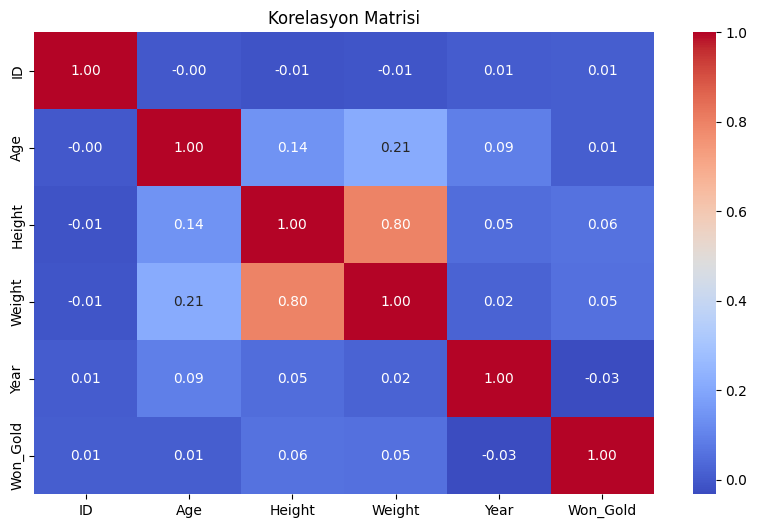

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasyon Matrisi")
plt.show()
#sayisal sutunlar korelasyonu matroiisi

kategorik değişkenler arası korelasyon matrisi

C:\Users\ahmet\AppData\Local\Temp\ipykernel_24616\3493706014.py:14: PerformanceWarning: The following operation may generate 9711314116 cells in the resulting pandas object.
  confusion_matrix = pd.crosstab(x, y)


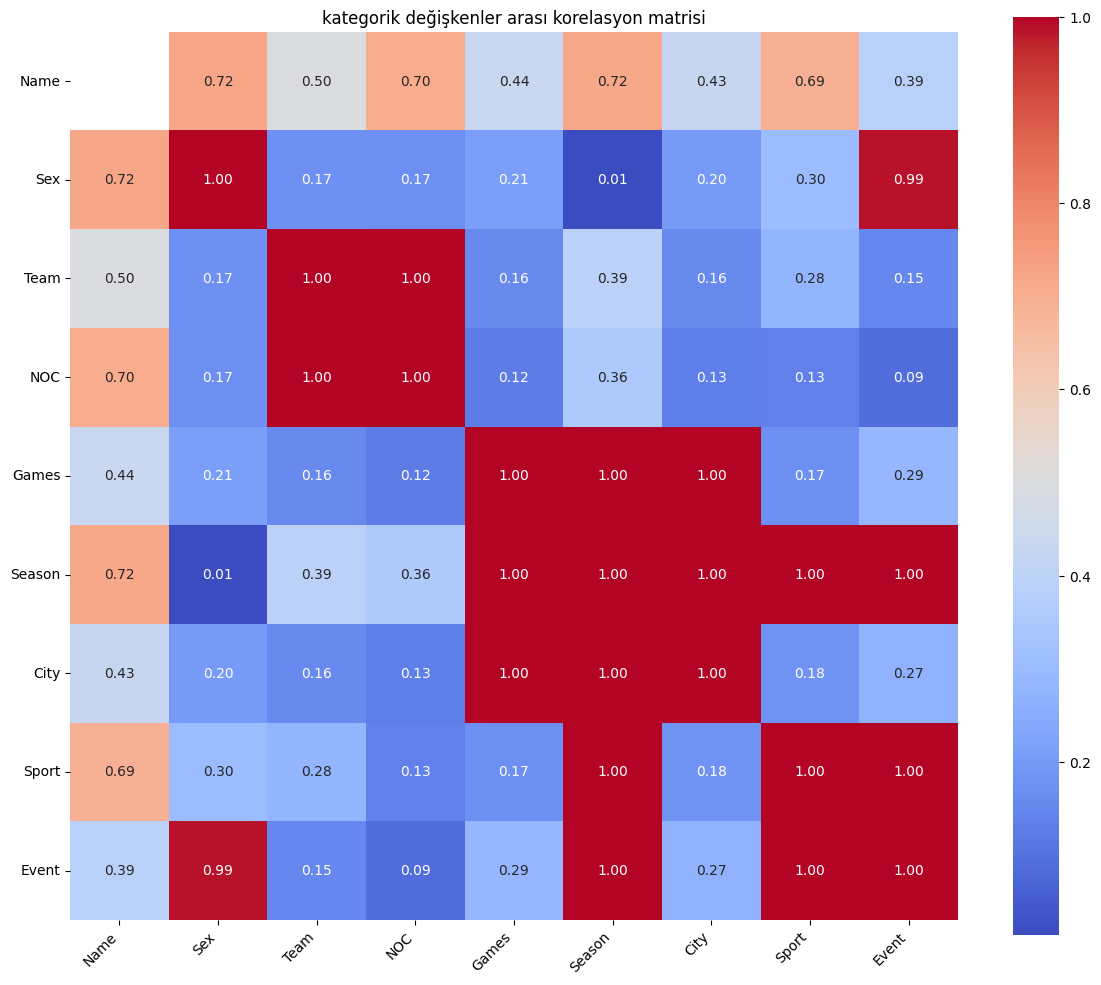

In [4]:
categorical_cols = df.select_dtypes(include='object').columns
df_categorical = df[categorical_cols]
df_categorical.head()


import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
import numpy as np
import pandas as pd

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    rcorr = r - ((r-1)**2) / (n-1)
    kcorr = k - ((k-1)**2) / (n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Cramér's V matrisini hesapla
cramers_results = pd.DataFrame(index=categorical_cols, columns=categorical_cols)

for col1 in categorical_cols:
    for col2 in categorical_cols:
        try:
            cramers_results.loc[col1, col2] = cramers_v(df[col1], df[col2])
        except:
            cramers_results.loc[col1, col2] = np.nan

cramers_results = cramers_results.astype(float)


plt.figure(figsize=(12, 10))
sns.heatmap(cramers_results, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("kategorik değişkenler arası korelasyon matrisi")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
#kategorik sutunlar korelasyon matrisi

ÖZELLİK MÜHENDİSLİĞİ

özellik mühendisliğinde yapılan işlemler sırasıyla 
yaşa göre gruplama
id ye göre önceki oyun sayısını bulma yani kaç kere oyun oynamış
id ye göre altın madalya sayısını bulma 
yıla ve ülkeye göre altın madalya sayısını bulma

In [5]:
df['BMI'] = df['Weight'] / ((df['Height'] / 100) ** 2)
df['BMI'] = df['BMI'].round(2)



def age_group(age):
    if age < 18:
        return 'Genç'
    elif age < 30:
        return 'Yetişkin'
    elif age < 40:
        return 'Olgun'
    else:
        return 'Veteran'

df['Age_Group'] = df['Age'].apply(age_group)

#burada yapılan işlem yaşa göre gruplama

df['Total_Games'] = df.groupby('ID')['Games'].transform('nunique')

#burada yapılan işlem id ye göre oyun sayısını buluyor ve önceki oyun sayısını buluyor

df['Previously_Won_Gold'] = df.groupby('ID')['Won_Gold'].cumsum() - df['Won_Gold']
df['Previously_Won_Gold'] = df['Previously_Won_Gold'].apply(lambda x: 1 if x > 0 else 0)

#burada yapılan işlem id ye göre altın madalya sayısını buluyor ve önceki altın madalya sayısını buluyor

df['Yearly_Gold_Ratio'] = df.groupby('Year')['Won_Gold'].transform('mean')
df['Country_Gold_Ratio'] = df.groupby('NOC')['Won_Gold'].transform('mean')
#burada yapılan işlem yıla göre altın madalya oranını buluyor ve ülkeye göre altın madalya oranını buluyor

KATEGORİK VERİLERİN KODLANMASI
bunu yaparken get dummies kullandık.

In [6]:
df = pd.get_dummies(df, columns=['Sex', 'Season', 'Sport', 'Age_Group'], drop_first=True)

veriyi ölçekleme

In [7]:
from sklearn.preprocessing import StandardScaler
import joblib  # ← bunu ekle

# Hedef dışındaki sayısal sütunlar
features_to_scale = ['Age', 'Height', 'Weight', 'BMI', 'Total_Games','Year', 'Yearly_Gold_Ratio', 'Country_Gold_Ratio']
scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Scaler'ı .pkl dosyası olarak kaydet
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

eğitim test ayırm

hedef değişkeni altın madalya kazanıp kazanmadığına ayarladık.

In [8]:
from sklearn.model_selection import train_test_split

# Hedef değişken altın madalya kazanıp kazanmadığı
y = df['Won_Gold']

X = df.drop(columns=['Won_Gold', 'Name', 'ID', 'Team', 'NOC', 'Games', 'City', 'Event'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)



import joblib  # emin olmak için tekrar ekliyoruz

# Eğitimde kullanılan X varsa (muhtemelen zaten var), sütun isimlerini al
feature_names = X.columns.tolist()

# Bu listeyi dosyaya kaydet
joblib.dump(feature_names, "feature_names.pkl")


['feature_names.pkl']

şimdi modelleri eğitme zamanıç. random forest xgboost ve lojistkiregresyon ile

LOJİSTİK REGRESYON  eğitme süresi 5,8 sn

Logistic Regression Modeli Oluşturuldu
roc_auc_score: 0.8039245309535521
accuracy_score: 0.9504765600368636
classification_report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97     39200
           1       0.47      0.04      0.07      2033

    accuracy                           0.95     41233
   macro avg       0.71      0.52      0.52     41233
weighted avg       0.93      0.95      0.93     41233



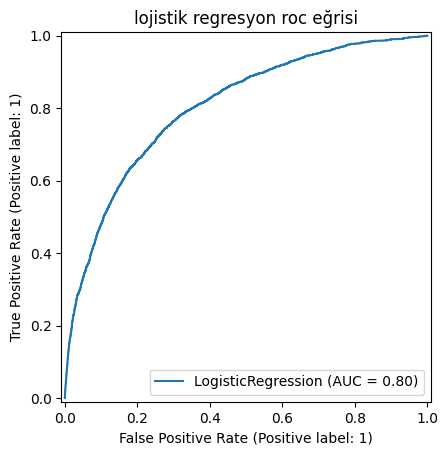

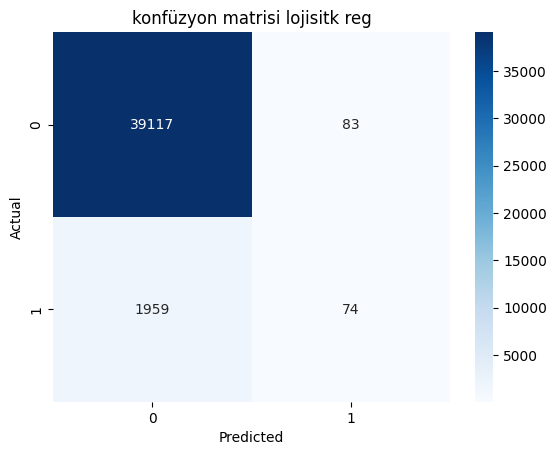

['logistic_model.pkl']

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Modeli oluştur
lr_model = LogisticRegression(max_iter=100)
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
y_proba_lr = lr_model.predict_proba(X_test)[:, 1]
print("Logistic Regression Modeli Oluşturuldu")
print("roc_auc_score:",roc_auc_score(y_test, y_proba_lr))
print("accuracy_score:",accuracy_score(y_test, y_pred_lr))
print("classification_report:\n",classification_report(y_test, y_pred_lr))

# ROC Eğris
RocCurveDisplay.from_estimator(lr_model, X_test, y_test)
plt.title("lojistik regresyon roc eğrisi")
plt.show()

# Karışıklık Matrisi
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="d", cmap="Blues")
plt.title("konfüzyon matrisi lojisitk reg")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

joblib.dump(lr_model, "logistic_model.pkl")



RANDOM FOREST  eğitme süresi 25.2 sn

Random Forest Accuracy: 0.9495307156888899
Random Forest ROC AUC: 0.8561425948884226
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     39200
           1       0.47      0.17      0.25      2033

    accuracy                           0.95     41233
   macro avg       0.71      0.58      0.61     41233
weighted avg       0.93      0.95      0.94     41233



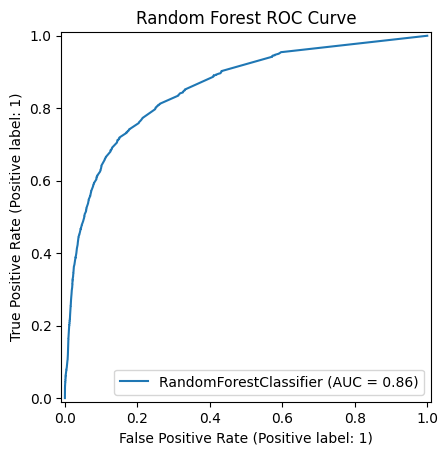

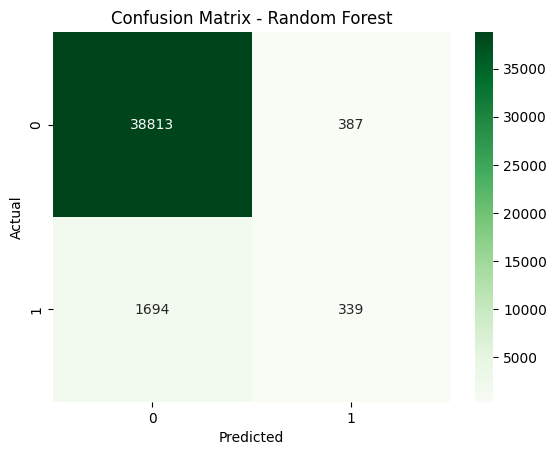

['rf_model.pkl']

In [10]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest ROC AUC:", roc_auc_score(y_test, y_proba_rf))
print(classification_report(y_test, y_pred_rf))

RocCurveDisplay.from_estimator(rf_model, X_test, y_test)
plt.title("Random Forest ROC Curve")
plt.show()

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
joblib.dump(rf_model, "rf_model.pkl")



XGBOOST eğitme süresi 1,3 sn

c:\Users\ahmet\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:00:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.9560303640288119
XGBoost ROC AUC: 0.8761597794553138
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     39200
           1       0.74      0.17      0.27      2033

    accuracy                           0.96     41233
   macro avg       0.85      0.58      0.63     41233
weighted avg       0.95      0.96      0.94     41233



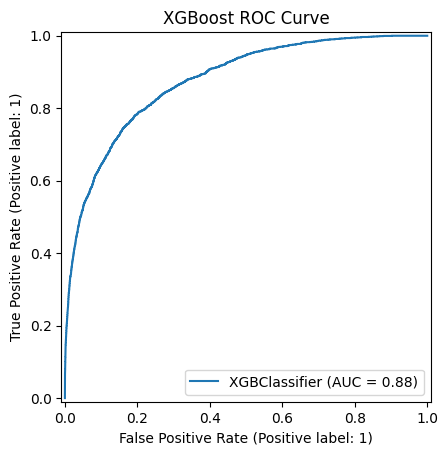

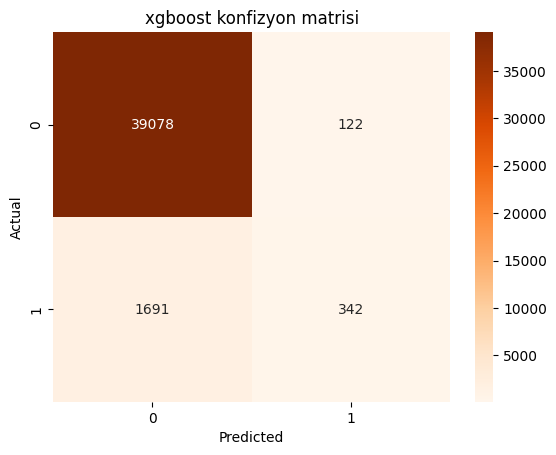

['xgb_model.pkl']

In [11]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost ROC AUC:", roc_auc_score(y_test, y_proba_xgb))
print(classification_report(y_test, y_pred_xgb))

RocCurveDisplay.from_estimator(xgb_model, X_test, y_test)
plt.title("XGBoost ROC Curve")
plt.show()

sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt="d", cmap="Oranges")
plt.title("xgboost konfizyon matrisi")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
joblib.dump(xgb_model, "xgb_model.pkl")



karşılaştırma sonunda xgboost tercih edilebilir en doğru eğitilen o


lightgbm lazım aga

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 8134, number of negative: 156798
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006130 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 900
[LightGBM] [Info] Number of data points in the train set: 164932, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
LightGBM Accuracy: 0.7996992700021828
LightGBM ROC AUC: 0.8676996333457141
              precision    recall  f1-score   support

           0       0.99      0.80      0.88     39200
           1       0.17      0.78      0.28      2033

    accuracy                           0.80     41233
   macro avg       0.58      0.79      0.58     41233
weighted avg   

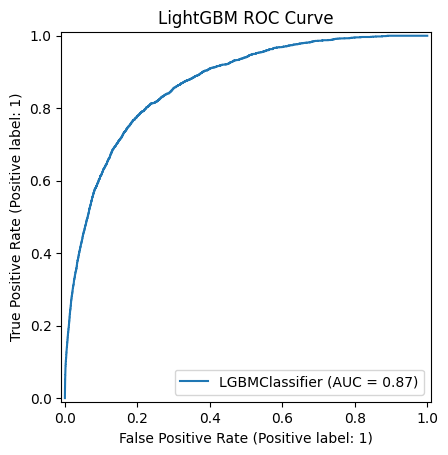

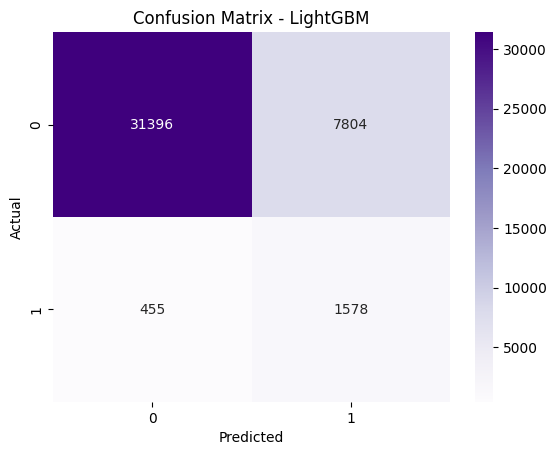

['lgbm_model.pkl']

In [12]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, RocCurveDisplay

# Modeli oluştur ve eğit
lgbm_model = LGBMClassifier(class_weight='balanced', random_state=42)
lgbm_model.fit(X_train, y_train)

# Tahminler
y_pred_lgbm = lgbm_model.predict(X_test)
y_proba_lgbm = lgbm_model.predict_proba(X_test)[:, 1]

# Performans çıktıları
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgbm))
print("LightGBM ROC AUC:", roc_auc_score(y_test, y_proba_lgbm))
print(classification_report(y_test, y_pred_lgbm))

# ROC Eğrisi
RocCurveDisplay.from_estimator(lgbm_model, X_test, y_test)
plt.title("LightGBM ROC Curve")
plt.show()

# Konfüzyon Matrisi
sns.heatmap(confusion_matrix(y_test, y_pred_lgbm), annot=True, fmt="d", cmap="Purples")
plt.title("Confusion Matrix - LightGBM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
joblib.dump(lgbm_model, "lgbm_model.pkl")


In [13]:
feature_names = X.columns.tolist()
joblib.dump(feature_names, "feature_names.pkl")


['feature_names.pkl']